In [68]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest

In [42]:
data = pd.read_csv('./thread_count_constant.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)

sequence = ['singleThread_constant','twoThreads_constant','threeThreads_constant', 'fourThreads_constant','fiveThreads_constant', 'sixThreads_constant','sevenThreads_constant','eightThreads_constant']
data = data.reindex(columns=sequence)

dataForBoxplot = data.copy()
dataForScatter = data.copy()

data.loc['mean'] = data.mean(axis=0).round().astype(int)

data

runName,singleThread_constant,twoThreads_constant,threeThreads_constant,fourThreads_constant,fiveThreads_constant,sixThreads_constant,sevenThreads_constant,eightThreads_constant
0,30453,21763,18732,18214,16298,17604,17650,16713
1,23731,21041,17724,16420,17376,15911,15749,16751
2,20813,21538,17518,17103,15312,18033,18700,17366
3,27862,22575,17387,17185,17830,17213,16375,15945
4,30159,21527,18537,18298,18277,17907,16937,17082
...,...,...,...,...,...,...,...,...
96,29104,21551,17976,16914,17660,16172,18008,16762
97,32853,21426,17733,15583,16134,17435,18487,17450
98,32945,21590,17897,17259,15210,16842,18295,17922
99,31995,21685,17669,15421,16745,15857,18721,16862


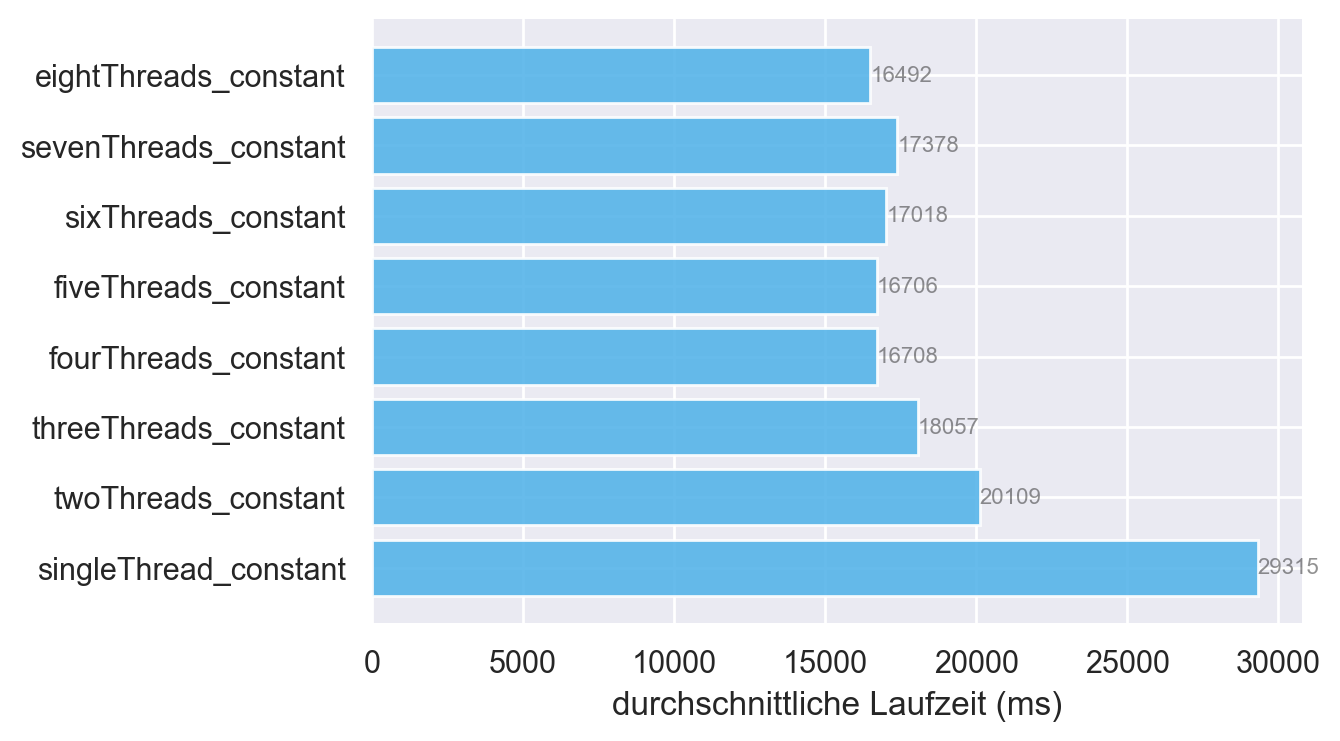

In [43]:
from matplotlib.text import Text
plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)


# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [5]:
fig.savefig('measurements_thread_count_new.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

In [44]:
dataNew = {'threads': [1, 2, 3, 4, 5, 6, 7, 8],'laufzeit': [data['singleThread_constant'].mean().round().astype(int), data['twoThreads_constant'].mean().round().astype(int), data['threeThreads_constant'].mean().round().astype(int), data['fourThreads_constant'].mean().round().astype(int), data['fiveThreads_constant'].mean().round().astype(int), 
                                                                       data['sixThreads_constant'].mean().round().astype(int), data['sevenThreads_constant'].mean().round().astype(int), data['eightThreads_constant'].mean().round().astype(int)]}

df = pd.DataFrame(dataNew,columns=['threads','laufzeit'])
df

,threads,laufzeit
0,1,29315
1,2,20109
2,3,18057
3,4,16708
4,5,16706
5,6,17018
6,7,17378
7,8,16492


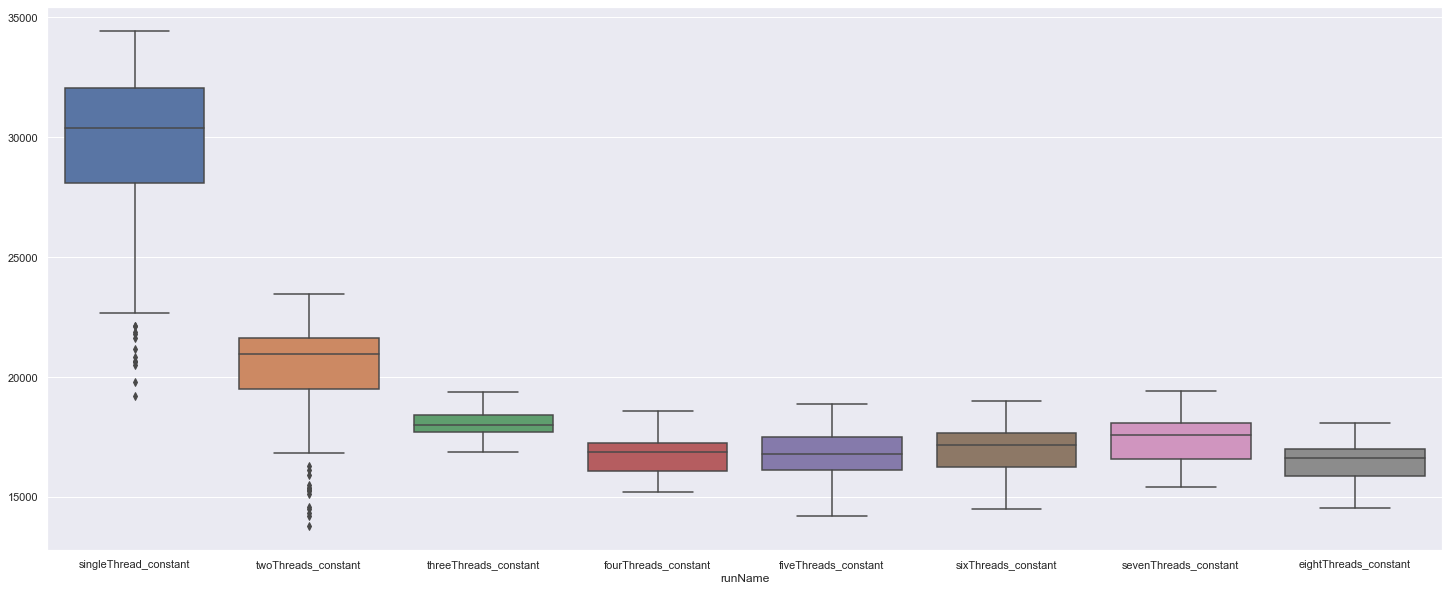

In [101]:
#sns.set_theme(style="whitegrid")
#sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(data=dataForBoxplot)
plt.savefig('boxplot.png')
#Boxgröße zeigt die Streeung an, drei vier und eight die geringste Streuung

In [108]:
iqaData = {'singleThread_IQA': [(dataForBoxplot['singleThread_constant'].quantile(q=0.75) - dataForBoxplot['singleThread_constant'].quantile(q=0.25))]}
iqa = pd.DataFrame(iqaData, columns=['singleThread_IQA'])

iqa['twoThreads_IQA'] = dataForBoxplot['twoThreads_constant'].quantile(q=0.75) - dataForBoxplot['twoThreads_constant'].quantile(q=0.25)
iqa['threeThreads_IQA'] = dataForBoxplot['threeThreads_constant'].quantile(q=0.75) - dataForBoxplot['threeThreads_constant'].quantile(q=0.25)
iqa['fourThreads_IQA'] = dataForBoxplot['fourThreads_constant'].quantile(q=0.75) - dataForBoxplot['fourThreads_constant'].quantile(q=0.25)
iqa['fiveThreads_IQA'] = dataForBoxplot['fiveThreads_constant'].quantile(q=0.75) - dataForBoxplot['fiveThreads_constant'].quantile(q=0.25)
iqa['sixThreads_IQA'] = dataForBoxplot['sixThreads_constant'].quantile(q=0.75) - dataForBoxplot['sixThreads_constant'].quantile(q=0.25)
iqa['sevenThreads_IQA'] = dataForBoxplot['sevenThreads_constant'].quantile(q=0.75) - dataForBoxplot['sevenThreads_constant'].quantile(q=0.25)
iqa['eightThreads_IQA'] = dataForBoxplot['eightThreads_constant'].quantile(q=0.75) - dataForBoxplot['eightThreads_constant'].quantile(q=0.25)
iqa.to_html('iqa.html')

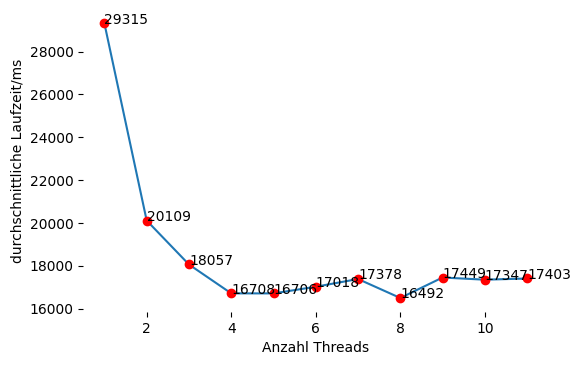

In [16]:
x, y = dataNew['threads'], dataNew['laufzeit']

figScatter, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r', zorder=2)
plt.plot(x, y, zorder=1)
plt.xlabel("Anzahl Threads")
plt.ylabel("durchschnittliche Laufzeit/ms")
for i, txt in enumerate(dataNew['laufzeit']):
    ax.annotate(txt, (dataNew['threads'][i], dataNew['laufzeit'][i]))

for spine in ax.spines.values():
    spine.set_visible(False)

In [9]:
figScatter.savefig('threads_scatter.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

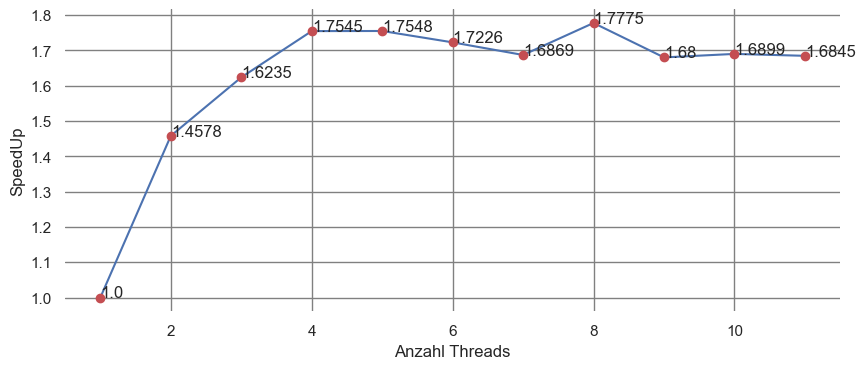

In [34]:
#Speedup
speedup = {}
for i in range(0,11):
    speedup[i+1] = round((dataNew['laufzeit'][0] / dataNew['laufzeit'][i]),4)

spArray = np.array(list(speedup.values()))
x, y = dataNew['threads'], spArray

figScatter2, ax = plt.subplots(figsize=(10,4), dpi=100)
ax.set_facecolor('xkcd:white')
ax.grid(color='grey')
ax.scatter(x, y, color='r',zorder=2)
plt.plot(x, y, zorder=1)
plt.xlabel("Anzahl Threads")
plt.ylabel("SpeedUp")

for i, txt in enumerate(spArray):
    ax.annotate(txt, (dataNew['threads'][i], spArray[i]))

for spine in ax.spines.values():
    spine.set_visible(False)

In [35]:
figScatter2.savefig('threads_scatter2_speedup_2.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')